# Import required libraries and config

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.config.constants import PATH_TO_INPUT_DIR

# Read Data

In [65]:
auto_wait_data = pd.read_csv(PATH_TO_INPUT_DIR + 'auto_wait_times_cleaned.csv')
auto_wait_data.head()

,date,waiting_time,is_public_holiday,day_of_week,is_semester,train_traffic
0,2022-11-07,17,False,0,True,26
1,2022-11-08,42,False,1,False,34
2,2022-11-09,49,False,2,False,29
3,2022-11-10,16,True,3,False,31
4,2022-11-12,44,False,5,False,32


# Defining Test Metric. Why do we need it?

## Candidate metrics

In order to arrive at the evaluation metric of our choice, we evaluated multiple metrics. Please find a brief summary of the metrics we looked at and the pros/cons of them in our context. 

1. Mean Absolute Error ( MAE )
$$ MAE = Mean(|e_i|)$$
    - Cons:- 
        * Scale dependent
        * Averages out the error across the whole series

---
        
2. Root Mean Squared Error ( RMSE )
$$ RMSE = \sqrt mean(e_i^2) $$
    - Pros:-
        * Penalises larger deviations more than smaller deviations
    - Cons:-
        * Scale dependent
        * Sensitive to outliers

---

3. Mean Absolute Percentage Error ( MAPE )
$$ MAPE = mean(|e_i| / y_i) * 100 $$  

    - Pros:-
        * Scale independent
    - Cons:-
        * Undefined if the actual figure is 0 for an observation
---        


For the purpose of this demo, we will go ahead with *MAPE* as our choice of test metric.

# Train Test Split

In [66]:
labels = auto_wait_data.drop(columns=['waiting_time'])
target = auto_wait_data[['waiting_time']].copy()
labels.shape, target.shape

((148, 5), (148, 1))

In [67]:
labels_train, labels_test, target_train, target_test = train_test_split(labels, target, test_size=0.33, random_state=42)
labels_train.shape, labels_test.shape, target_train.shape, target_test.shape

((99, 5), (49, 5), (99, 1), (49, 1))

# Establish Baseline

## Mean baseline

In [68]:
target_train['waiting_time'].describe()

count    99.000000
mean     39.131313
std      16.641261
min       6.000000
25%      26.000000
50%      38.000000
75%      56.000000
max      64.000000
Name: waiting_time, dtype: float64

In [74]:
mean_wait_train = target_train['waiting_time'].mean()
print("The mean wait time for the train set = ", mean_wait_train)

The mean wait time for the train set =  39.13131313131313


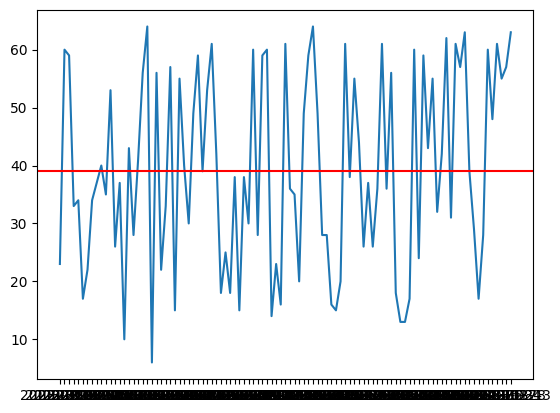

In [70]:
plt.plot(labels_train['date'], target_train['waiting_time'])
plt.axhline(mean_wait_train, color='r') # horizontal

In [79]:
train_preds_mean = [mean_wait_train for _ in range(target_train.shape[0])] 
train_mape_mean = mean_absolute_percentage_error(target_train['waiting_time'], train_preds_mean)
print("Train MAPE (Mean Model) = ", train_mape_mean)

Train MAPE =  0.5470118607184733


In [83]:
test_preds_mean = [mean_wait_train for _ in range(target_test.shape[0])]
test_mape_mean = mean_absolute_percentage_error(
    target_test['waiting_time'], test_preds_mean
)
print("Test MAPE = ", test_mape_mean)

Test MAPE =  0.5218410830732448
